# chapter 2 - Supervised Learning
Classification and Regression

Generalization, Overfitting and Underfitting

<br></br>
## 1 분류와 회귀
Classification and Regression

### 01 분류
미리 <strong>가능성이 정의된 클래스 레이블</strong> 중 하나를 예측하는 모델의 생성
1. 이진분류 binary classification  $ex) 예/ 아니오$
2. 다중분류 multiclass classification $ex) 동물분류, 감정분석$

### 02 회귀
<strong>연속적인 숫자</strong> (컴퓨터:부동소수점수, 수학:실수) 데이터를 통한 모델의 예측
출력값이 연속성이 있는지에 따라 분류와 회귀식이 구분된다

<br></br>
## 2 일반화, 과대적합, 과소적합
Generalize, Overfit, Underfit

### 01 개념
1. 일반화 generalization - 처음보는 데이터에 대해서도 정확하게 예측이 가능할 떄
2. 과대적합 : 정보를 많이 사용하여 복잡한 모델을 생성시
3. 과소적합 : 정보가 부족하여 다양성을 찾지 못하는 경우

<strong>최적점의 모델</strong>을 찾기 위해서는 모델을 반복적으로 테스트 해야 한다

<img src="https://onlinecourses.science.psu.edu/stat857/sites/onlinecourses.science.psu.edu.stat857/files/lesson04/model_complexity.png" align="left" width='500'>

### 02 모델의 복잡도와 데이터set의 크기
복잡도와 모델크기의 관계
1. 복잡도 : 다양한 데이터 포인트를 활용하여 모델을 생성
2. 모델의크기 : 모델과 함께 병행하여, 데이터양에 의한 결과값의 힘도 주요함에 유의

<br></br>
## 3 데이터 셋 만들기
Supervised Machine Learning Algorithms

### 01 데이터 셋 01
forge Data Set

In [1]:
import matplotlib
matplotlib.rc('font', family='NanumGothic')

In [2]:
import numpy as np
from data import mglearn   # ./data/mglearn 폴더의 *.py 파일들을 활용

# < 본래 도서의 데이터 생성내용 >
# X, y = mglearn.datasets.make_forge()
# np.save('./data/X_01',X)
# np.save('./data/y_01',y)
X = np.load('./data/X_01.npy')
y = np.load('./data/y_01.npy')

X.shape (26, 2)


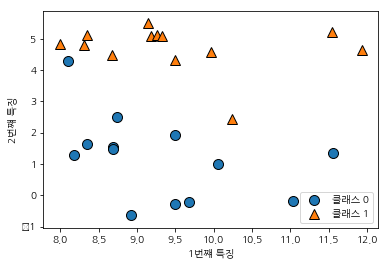

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

mglearn.discrete_scatter(X[:, 0], X[:,1], y)
plt.legend(["클래스 0", "클래스 1"], loc = 4)     # 데이터 1: 클래스 0, 데이터 2 : 클래스 1
plt.xlabel('1번쨰 특징'); plt.ylabel('2번쨰 특징')
print("X.shape", X.shape)

In [4]:
# 데이터셋1
# 포인트 26개와 특성 2개를 같는 데이터를 생성

### 02 데이터 셋 02
Wave Data Set

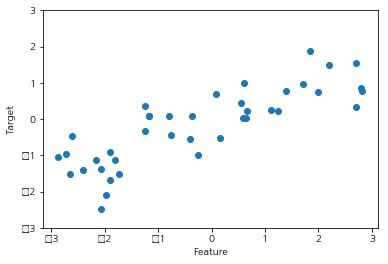

In [5]:
# X, y = mglearn.datasets.make_wave(n_samples = 40)
# np.save('./data/X_02',X)
# np.save('./data/y_02',y)
X = np.load('./data/X_02.npy')
y = np.load('./data/y_02.npy')

plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature"); plt.ylabel("Target")

### 03 데이터 셋 03
sklearn에 저장된 <strong>유방암 데이터</strong> 불러오기

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print("cancer.keys() : {}".format(cancer.keys()))
print("유방암 데이터 Shape : {}".format(cancer.data.shape))
print("\n클래스별 샘플 수 :\n{}".format(
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print("\nFeature 이름   :\n{}".format(cancer.feature_names))
#cancer.DESCR  # 유방암 데이터에 대한 자세한 정보

cancer.keys() : dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
유방암 데이터 Shape : (569, 30)

클래스별 샘플 수 :
{'malignant': 212, 'benign': 357}

Feature 이름   :
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### 04 데이터 셋 04
sklearn에 저장된 <strong>보스턴 주택가격 데이터</strong> 불러오기

In [7]:
from sklearn.datasets import load_boston
boston = load_boston()
print("주택 테이터 형태 : {}".format(boston.data.shape))

주택 테이터 형태 : (506, 13)


In [8]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape : {}".format(X.shape))

X.shape : (506, 104)


<br></br>
## 4 KNN 알고리즘 분류
K-Nearest Neighbors

### 01 KNN 학습모델 생성하기
K-Nearest Neighbors

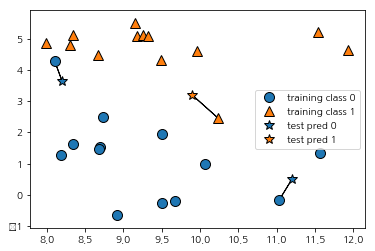

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors = 1)

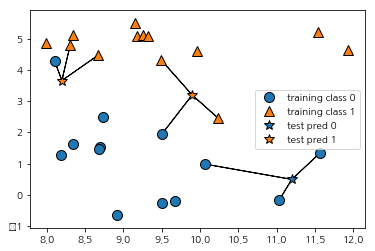

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors = 3)

In [11]:
# 데이터를 Train (75%)/ Test로 분류 (25%)
from sklearn.model_selection import train_test_split
X, y  = np.load('./data/X_01.npy'), np.load('./data/y_01.npy')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Train 데이터로 학습, test로 모델을 평가
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
print("Test set predictions: {}".format(clf.predict(X_test)))
print("Test set accuracy   : {:.2f}".format(clf.score(X_test, y_test)))

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy   : 0.86


### 02 KNN의 결정경계 시각화
Analyzing KNeighborsClassifierKNN

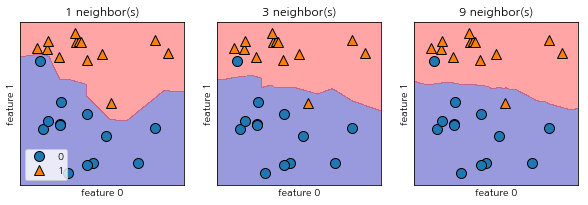

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # .fit메서드는 self 객체를 반환한다. 떄문에 한줄로 데이터입력과 모델생성이 가능
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0"); ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

In [13]:
# 결론
# 이웃의 갯수가 늘어날수록 결정경계가 더 부드러워 진다 (부드러울수록 단순한 모델이 생성됨을 의미한다)

### 03 모델의 복잡도와  일반화 모델 사이의 관계를 입증
유방암 데이터를 활용

In [14]:
# Import Data Sets
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [15]:
# Build the Model
training_accuracy, test_accuracy  = [], []
neighbors_settings = range(1, 11)  # 1에서 11번

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train)) # 훈련세트의 정확도 'training_accuracy' 저장
    test_accuracy.append(clf.score(X_test, y_test))       # 일반화 정확도 'test_accuracy' 저장

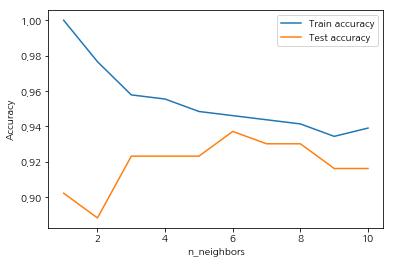

In [16]:
# Visualization    
plt.plot(neighbors_settings, training_accuracy, label="Train accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test accuracy")
plt.ylabel("Accuracy"); plt.xlabel("n_neighbors"); plt.legend()

아래 그래프의 좌우가 뒤집힌 형태의 그래프를 출력한다
1. 이웃을 1개 사용시 Overfit(과적합), Train에만 들어맞는다
2. 이웃을 10개 사용시 모델이 너무 단순해서 정확가 낮다
3. 중간의 6개가 최적의 모델을 생성함이 판단 가능하다

<img src="https://onlinecourses.science.psu.edu/stat857/sites/onlinecourses.science.psu.edu.stat857/files/lesson04/model_complexity.png"  align="left" width='300'>

### 04 K-최근접 이웃 알고리즘을 활용한 <strong>회귀분석</strong>
k-Neighbors Regression

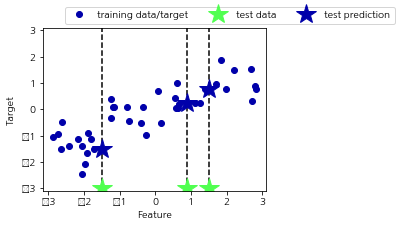

In [17]:
# 이웃이 1일떄
# 개별 점으로 표시
mglearn.plots.plot_knn_regression(n_neighbors = 1, figsize=(4,3))

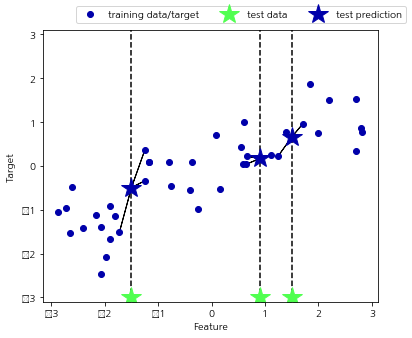

In [18]:
# 이웃이 여럿일떄
# 최근접 이웃 값들의 평균을 예측
mglearn.plots.plot_knn_regression(n_neighbors = 3, figsize=(6,5))

In [19]:
# 40개의 데이터를 생성
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples = 40)
X.shape, y.shape

((40, 1), (40,))

In [20]:
# 훈련/ 테스트 모델로 나누고 KNN 회귀 모델을 생성
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

print("Test set 예측:\n{}".format(reg.predict(X_test)))
print("Test set R^2(결정계수) 예측: {:.2f}".format(reg.score(X_test, y_test)))

Test set 예측:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2(결정계수) 예측: 0.83


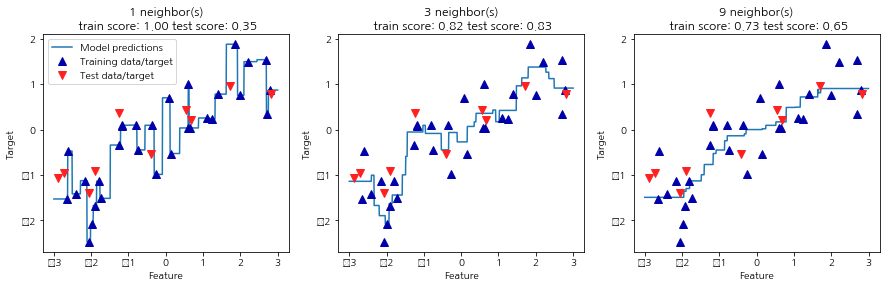

In [21]:
# -3 ~ 3 사이의 1000개 데이터를 생성한다 : Learning rate 반복시 활용할 데
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

# Visualization
fig, axes = plt.subplots(1, 3, figsize = (15, 4))
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors = n_neighbors) # 1, 3, 9개 이웃의 수를 적용
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c = mglearn.cm2(0), markersize = 8) # 파람 삼각형
    ax.plot(X_test, y_test, 'v', c = mglearn.cm2(1), markersize = 8)   # 빨간 삼각형
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature"); ax.set_ylabel("Target")
    
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

In [22]:
# KNN의 특징 정리
# 매개변수로, 1.데이터 거리측정 방법과 2. 이웃의 갯수 를 지정해야 한다
# KNN은 이해하기 용이하지만, 속도가 느리고, 이웃의 갯수의 한계로 현업에서 적극적으로 활용되지는 못한다

<br></br>
## 5 선형모델
linear Model
### 01 회귀 선형모델
linear Regression

w[0]: 0.393906  b: -0.031804


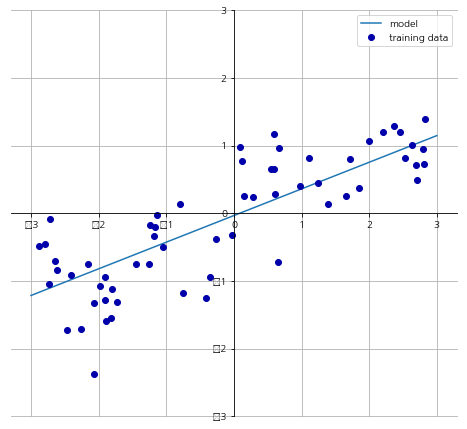

In [23]:
mglearn.plots.plot_linear_regression_wave()

In [24]:
# 결론
# 선형 모델은 직선으로 인한 모델의 제약이 많은 편이다.

### 02 선형회귀
최소 제곱법 Ordinary Least Squares

평균제곱오차 (mean square error)를 최소화 하는 weight와 bias를 찾는다

In [25]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_      (weight: 가중치(weight)/ 계수(coefficient)) : {}".format(lr.coef_))
print("lr.intercept_ (bias : 편향(offset)  / 절편(intercept))   : {}".format(lr.intercept_))

lr.coef_      (weight: 가중치(weight)/ 계수(coefficient)) : [ 0.39390555]
lr.intercept_ (bias : 편향(offset)  / 절편(intercept))   : -0.03180434302675973


In [26]:
# 모델의 변수값을 메서드로 저장/ 호출이 가능하다
# 메서드 맨 뒤의 '_'는 유도된 속성들에 붙이는 표시이다

In [27]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score    : {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score    : 0.66


In [28]:
# 결과값이 크지 않지만,
# train/ test의 값의 차이가 적은 것은 모델의 안정성이 높다는 의미이다

In [29]:
# Boston 전셋값 데이터를 적용
# 데이터가 104개 컬럼으로 복잡하게 구성
X, y = mglearn.datasets.load_extended_boston()
print('X.shape is : {}'.format(X.shape))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("\nTraining set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score    : {:.2f}".format(lr.score(X_test, y_test)))

X.shape is : (506, 104)

Training set score: 0.95
Test set score    : 0.61


In [30]:
# 컬럼이 104개인 복잡한 데이터인 경우
# 모델의 결과가 train에 과적합 되어 있음을 알 수 있다
# 이 경우에는 복잡도를 제어 가능한 대안을 찾아야 하고, 예로 '릿지 회귀'가 있다

### 03 릿지 회귀
Ridge Regression

'weight' 값이 0에 가깝도록, 제약조건 모델을 만든다

In [31]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score:     {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score:     0.75


In [32]:
# 결과
# 모델생성의 제약조건으로, 덜 과적합된 일반화 모델을 생성한다
# alpha 값이 작으면, 제약이 풀리면서 모델은 단순하게 생성한다 (linear regression와 동일한 모델 생성)
# alpha 값이 크면, 복잡도가 낮아지면서(제약이 쎄짐) 모델 성능은 나쁘지만, 일반화된 모델이 된다

In [33]:
# alpha 자유도 높을 때 (오차가 적다)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))
ridge10.score(X_train, y_train) - ridge10.score(X_test, y_test)

Training set score: 0.79
Test set score: 0.64


0.15244941837855197

In [34]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))
ridge10.score(X_train, y_train) - ridge10.score(X_test, y_test)

Training set score: 0.93
Test set score: 0.77


0.15244941837855197

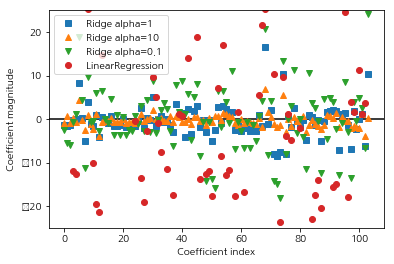

In [35]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim(); plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims); plt.ylim(-25, 25); plt.legend()

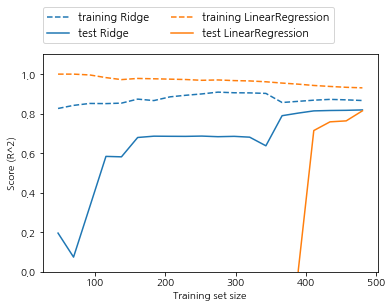

In [36]:
# 모델별 테스트 점수를 비교
mglearn.plots.plot_ridge_n_samples()

In [37]:
# 결과
# LinearRegression 은 데이터가 400개 이상 존재시에만 일반화가 가능하다
# Ridge 모델은 데이터가 적어도 일반화가 가능

### 04 라쏘 회귀
Lasso Regression

L1 규제를 활용하여, Ridge와 유사하게 계수를 0으로 만든다

In [38]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score : {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score     : {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 features 수   : {}".format(np.sum(lasso.coef_ != 0)))

Training set score : 0.29
Test set score     : 0.21
사용한 features 수   : 4


In [39]:
# 모두 점수가 낮은 '과소적합'의 상태로, alpha = 1 이 적용된 결과이다
# 이를 극복하기 위해 alpha 값을 더 줄이고, 대신 max_iter(반복 실행 최대횟수)를 늘려서 실행한다

# max_iter 을 늘리지 않고 실행하면, 경고가 발생한다
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score : {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score     : {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 features 수   : {}".format(np.sum(lasso001.coef_ != 0)))

Training set score : 0.90
Test set score     : 0.77
사용한 features 수   : 33


In [40]:
# Boston 집값데이터 105개 컬럼중, 대표적인 33개만 추출한 결과가 분석에 더 용이하다
# 만약 alpha 값을 너무 작게 잡으면, 효과가 무력해져서 과대적합으로 LinearRegression의 결과와 비슷하게 된다

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score : {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score     : {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 features 수   : {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score : 0.95
Test set score     : 0.64
사용한 features 수   : 94


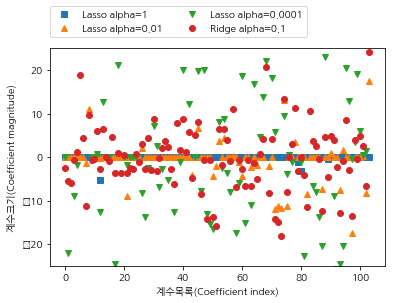

In [41]:
# Visualization 
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.ylim(-25, 25); plt.legend(ncol=2, loc=(0, 1.05))
plt.xlabel("계수목록(Coefficient index)"); plt.ylabel("계수크기(Coefficient magnitude)")

In [42]:
# 결과
# alpha 가 1일떄, 나머지 계수들도 모두 작은 값을 출력한다 (데이터가 뭉개진다)
# alpha 가 0.01, 이 때에도 대부분 특성이 0에 수렴한다
# alpha 가 0.00001, 규제를 받지 않는 자유로운 모델을 출력한다
# Ridge 모델을 사용하면, 자유로문 모델을 출력하고,
# 실무에서는 Ridge 모델을 선호하지만
# Lasso 모델은, 수 많은 특성 중 일부만 중요하고, 분석하기 쉬운 모델에 유용한 결과를 도출한다
# sklearn에서는 Lasso 와 Ridge의 패널티를 결합한 ElasticNet 모듈을 제공한다

### 05 분류형 선형모델
분류 모델링으로 Logistic Regression 과 SVM 이 가장 많이 알려져 있다.

이들은 회귀 알고리즘이 아님에 유의할 것 (이름에 Logistic이 포함됨에 주의)

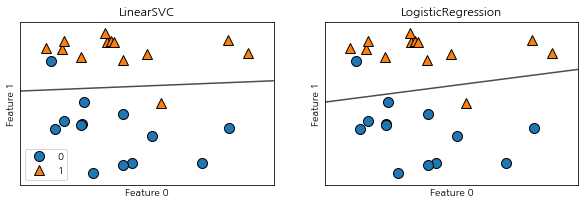

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = False, eps = 0.5,
                                    ax = ax, alpha = .7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

In [44]:
# 결과
# 두가지 모델이 같이 1개씩의 오분류를 하였다. 이는 기본적으로 L2 규제를 사용함을 알 수 있다
# 두 모델에서 규제 강도를 결정하는 매개변수는 'C'이다
# 'C'값을 높은값 설정시 : Train set에 overfit 하고 (개별 데이터를 정확하게 분류하려고 한다)
# 'C'값을 낮은값 설정시 : weight는 0에 가깝게 설정된다 (다수의 데이터를 포괄하는 모델을 생성)

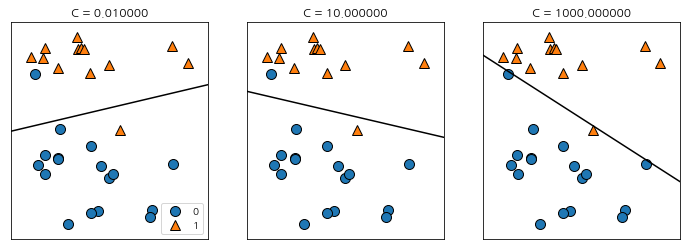

In [45]:
# 'C'값의 변화에 따른 LinearSVC의 변화를 시각화
mglearn.plots.plot_linear_svc_regularization()

In [46]:
# 결과
# 'C'가 10일떄 수평을 이루었고, 
# 'C'가 1,000일 떄에는 결정경계가 확 기울어져 모든 데이터를 잘 분류하였다

In [47]:
# 고차원의 분류 데이터를, 선형모델에 적용해보자
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.data.shape, cancer.target.shape)
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score    : {:.3f}".format(logreg.score(X_test, y_test)))

(569, 30) (569,)
Training set score: 0.955
Test set score    : 0.958


In [48]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score    : {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score    : 0.965


In [49]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score    : {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score    : 0.930


In [50]:
# 결과
# 'C' 값이 0.01, 1, 100 모든 경우에 양호한 모델을 생성한다
# 0.01을 사용시 과소 적합으로 모델의 성능이 나쁨을 알 수 있고
# 100을 사용시 세트의 정확도가 증가함을 통해, 복잡도가 높은 모델일수록 성능이 좋음을 알 수 있다

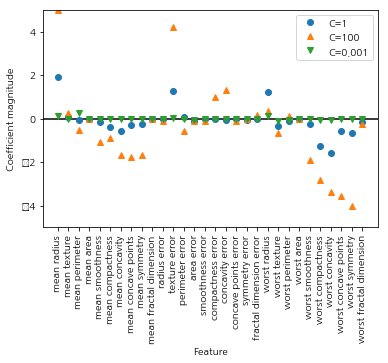

In [51]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim(); plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims); plt.ylim(-5, 5); plt.legend()
plt.xlabel("Feature"); plt.ylabel("Coefficient magnitude")

In [52]:
# 분석결과
# 이진 분류에는, '회귀모델을 활용한 분류'와 '선형모델' 사이에는 유사점이 많다

### 06 다중 클래스 분류형 선형모델
<strong>'로지스틱 회귀 모델'</strong> 제외한 <strong>대부분의 선형분리 모델은 태생적으로 '이진분류'</strong>만 지원한다

'다중 클래스' 분류로 확장하기 위한 보편적인 대안으로 <strong>'일대다 (One-vs-rest)'</strong> 방법을 활용한다.

일대다를 활용하면, <strong>클래스 수 만큼의 이진분류 모델이 생성</strong>되고, 모든 이진분류기가 작동시 가장 높은 점수를 갖는

분류기의 클래스를 최종 모델로 선택하면 된다.

개별 클래스는 weight, bias를 하나씩 갖게 되어 $ w[0]\times x[0] + w[1]\times x[1]....+ w[p]\times x[p] + b $ 모델형태를 갖는다

<strong>로지스틱 회귀 이면</strong>은 <strong>클래스 마다 하나의 weight와 bias</strong>를 갖으며 예측 방법은 동일하다

X data_set : (100, 2), 
y data_set : (100,)
y data : [0 1 2]


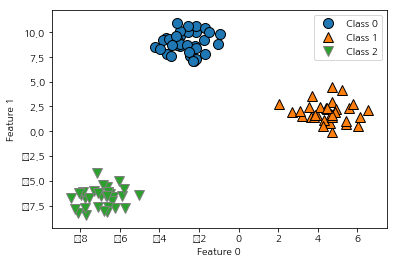

In [61]:
from sklearn.datasets import make_blobs

# 데이터 : 2차원 각 클래스의 데이터는 '정규분포'를 따른다
X, y = make_blobs(random_state=42)
print('X data_set : {}, \ny data_set : {}\ny data : {}'.format(X.shape, y.shape, np.unique(y)))

# One vs Rest 방식의 분류기를 활용
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [64]:
# LinearSVC 분류기를 활용하여 모델을 생성
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기 (Coefficient shape : .coef_   ) : ", linear_svm.coef_.shape)
print("절편 배열의 크기 (Intercept shape : .intercept_) : ", linear_svm.intercept_.shape)

계수 배열의 크기 (Coefficient shape : .coef_   ) :  (3, 2)
절편 배열의 크기 (Intercept shape : .intercept_) :  (3,)


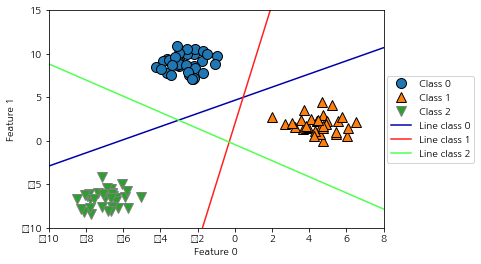

In [65]:
# 각 point 의 scatter plot 을 우선출력
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 

# LinearSVC 분류기를 활용하여 생성된 3개의 분류 모델을 시각화
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15); plt.xlim(-10, 8)
plt.xlabel("Feature 0"); plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2',
            'Line class 0', 'Line class 1','Line class 2'], 
            loc = (1.01, 0.3))  # 3개의 모델을 별도로 구분하여 시각화

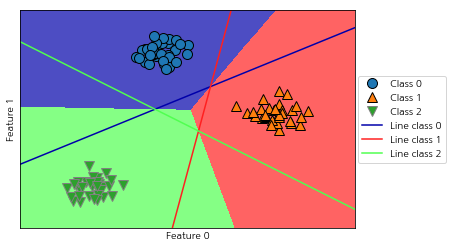

In [67]:
# Linear_SVM 의 모든 지점에 대한 평면 예측결과를 출력
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# LinearSVC 분류기를 활용하여 생성된 3개의 분류 모델을 덧붙여서 시각화
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1','Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0"); plt.ylabel("Feature 1")

In [ ]:
# 결론
# 평면의 모든 점의 분류를 시뮬레이션 해본 결과
# 3개의 분류직선이 겹치는 중앙의 영역은 가장 분류가 세밀하게 이루어진 구역이다

### 07 선형모델의 장단점과 매개변수
<h4><strong>회귀모델</strong> : <strong>alpha</strong> (값이 클수록 모델은 단순해진다)</h4>
<h4><strong>LinearSVC, LogisticRegression</strong> : <strong>C</strong> (값이 작을수록 모델은 단순해진다)</h4>
매개변수의 최적값은 <strong>Log Scale 단위(0.01, 0.1, 1, 10, 100)로</strong> 변화를 하며 최적값을 찾는다

그리고 기본적으로는 <strong>L2규제</strong>를 사용하고, 

중요특성이 많지 않거나, 개별 특성간 비교시 <strong>L1규제</strong>(몇가지 단순한 규제를 적용)를 사용한다

선형모델의 특징은 학습속도와 예측이 빠르고, 희소한 데이터셋에서도 잘 작동한다

샘플이 수십,백만개로 이루어진 경우에는 <strong>solver='sag'</strong> 옵션을 주거나

<strong>SGDClassifier, SGDRegressor</strong>를 사용한다

<strong>선형모델의 장점은 예측과 해석이 쉽다</strong>는 점 때문에, 샘플의 특성이 많을 떄 잘 작동한다

특히 다른모델로 학습하기 어려운 <strong>매우 큰 데이터셋</strong>에서도 선형모델을 많이 사용하고

대신 <strong>저차원의 데이터셋은 다른 모델들이 일반화 성능이 더 좋다</strong>

In [71]:
# instantiate model and fit it in one line
logreg = LogisticRegression().fit(X_train, y_train)

In [72]:
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

In [73]:
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)